In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CNBC dataset

In [4]:
data = pd.read_csv("cnbc_headlines.csv")

In [5]:
data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [6]:
data.shape

(3080, 3)

In [7]:
data.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [9]:
data.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [12]:
len(data[data.duplicated()])

0

In [13]:
data.shape

(2800, 3)

## Guardian headline dataset

In [15]:
data_g = pd.read_csv("guardian_headlines.csv")

In [16]:
data_g.shape

(17800, 2)

In [17]:
data_g.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [18]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.3+ KB


In [19]:
data_g.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [20]:
len(data_g[data_g.duplicated()])

0

## Reuters headlines dataset

In [22]:
data_r = pd.read_csv("reuters_headlines.csv")

In [23]:
data_r.shape

(32770, 3)

In [24]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [25]:
data_r.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [26]:
len(data_r[data_r.duplicated()])

55

In [27]:
data_r.drop_duplicates(keep="first",inplace=True)

In [28]:
len(data_r[data_r.duplicated()])

0

In [29]:
data_r.shape

(32715, 3)

## Text Preprocessing

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def preprocessing_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(lemmatize.lemmatize(i))

    return " ".join(y)

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# function to decide sentiment as positive,negative or neutral

def get_analysis(score):
    if score < 0.0:
        return 'Negative'
    elif score == 0.0:
        return 'Neutral'
    else:
        return 'Positive'

## working with description dataset

In [36]:
# concate cnbc headlines and reuters headlines dataset
new_data = pd.concat([data,data_r], axis = 0)

In [37]:
new_data.shape

(35515, 3)

In [38]:
new_data_copy = new_data.copy()

In [39]:
new_data.sample()

,Headlines,Time,Description
21808,Explainer: What are India's new foreign direct...,Jan 31 2019,India late last year modified foreign direct i...


In [40]:
# apply preprocessing to the description column of new_data

new_data['Description'] = new_data['Description'].apply(preprocessing_text)

In [41]:
new_data.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings company lancet publishes good new...
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock company going lower even though des...


In [42]:
# analyse polarity score of values in description and add new column of it in dataset
ds_score = []
for value in new_data['Description'].values:
    ds_score.append(analyzer.polarity_scores(value)['compound'])
new_data['ds_score'] = ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.1280
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,-0.2023
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings company lancet publishes good new...,0.3612
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,0.7096
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock company going lower even though des...,-0.6597
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,-0.3400
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...,0.3612
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...,-0.2263
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...,-0.6808


In [43]:
new_data['ds_score'] = new_data['ds_score'].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,Negative
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings company lancet publishes good new...,Positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,Positive
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock company going lower even though des...,Negative
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,Negative
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...,Positive
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...,Negative
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

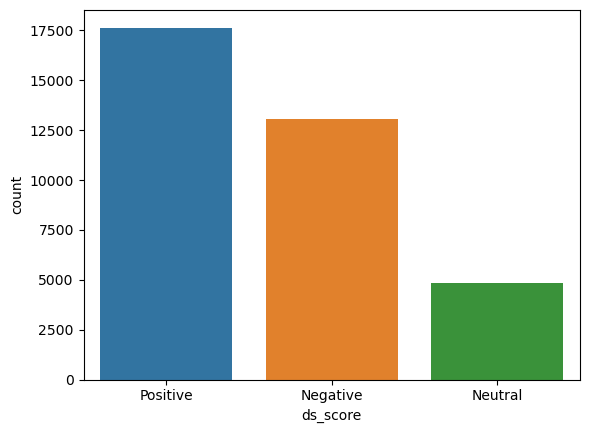

In [44]:
sns.countplot(x='ds_score',data=new_data)

## model building

## Support Vector Machine

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_data['ds_score'] = encoder.fit_transform(new_data['ds_score'])

In [48]:
new_data.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,2
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,0
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings company lancet publishes good new...,2
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,2
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock company going lower even though des...,0


## positive = 2
## negative = 0 
## neutral  = 1

In [50]:
X = new_data['Description']
y = new_data['ds_score']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [53]:
X_train = tv.fit_transform(X_train).toarray()

In [54]:
X_test = tv.transform(X_test).toarray()

In [55]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
ypred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test,ypred)